In [59]:
import pandas as pd

In [3]:
df=pd.read_csv(r'..\data\Ecommerce Customers.csv')

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.drop(['Email','Address','Avatar'],axis=1,inplace=True)

In [8]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
X=df.drop(['Yearly Amount Spent'],axis=1,inplace=False)

In [10]:
y=df['Yearly Amount Spent']

In [11]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [12]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [13]:
print(X.shape)
print(y.shape)

(500, 4)
(500,)


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [15]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_scaled ,y , test_size=0.25 , random_state=0 , shuffle=True )

#Splitted Data
print('X_train shape :',X_train.shape)
print('X_test shape :',X_test.shape)
print('y_train shape :',y_train.shape)
print('y_test shape :',y_test.shape)

X_train shape : (375, 4)
X_test shape : (125, 4)
y_train shape : (375,)
y_test shape : (125,)


In [16]:
X_train.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
239,-1.343751,-0.302193,1.498953,1.493044
59,0.707768,0.011748,0.208797,0.437848
406,-0.189490,0.022495,-1.477274,-1.136339
391,0.432382,-0.134731,0.254844,-0.197462
411,-0.061136,0.958371,-0.074696,1.088830


In [17]:
y_train

239    538.774933
59     547.365141
406    411.186964
391    503.175085
411    589.026490
          ...    
323    473.360496
192    505.119638
117    593.077241
47     563.672873
172    666.125592
Name: Yearly Amount Spent, Length: 375, dtype: float64

In [18]:
X_test.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
90,-0.566523,0.481131,0.807124,-1.059147
254,-0.344982,0.275672,-0.382938,-0.183498
283,0.024746,-0.589500,-1.371717,-1.727207
445,-0.847413,-0.321677,-1.413098,0.799779
461,-0.285105,-0.685367,-1.782057,0.501789


In [19]:
y_test.head()

90     449.070319
254    482.602467
283    374.269675
445    513.153112
461    502.771075
Name: Yearly Amount Spent, dtype: float64

In [20]:
from sklearn.linear_model import LinearRegression
LinearRegressionModel=LinearRegression(fit_intercept=True , copy_X=True , n_jobs=-1 )


In [21]:
LinearRegressionModel.fit(X_train,y_train)
# y = t1x1 + t2x2 + . . . . . t16x16
# y = 0.98x1 + 0.836x2 + . . . . . 0.362x16

LinearRegression(n_jobs=-1)

In [22]:
y_pred=LinearRegressionModel.predict(X_test)

In [23]:
list(y_pred)

[438.3882899317489,
 489.87912877098114,
 370.64151576657605,
 514.3740496281641,
 496.32026503062866,
 451.29279839278007,
 458.0666075335513,
 336.8927699303704,
 528.2538818178377,
 663.3170427822804,
 559.7450505287434,
 526.084030588077,
 552.266667299488,
 457.34723714054275,
 450.3275784254247,
 432.07243558431725,
 563.4909820172023,
 408.83311970899774,
 599.6136934919994,
 486.97464620689846,
 716.2872065161498,
 496.9670749421018,
 411.716280672369,
 556.2981629132383,
 551.323611736529,
 398.405521493823,
 421.31928070014135,
 395.67630620286553,
 548.3220965833008,
 463.5914582319884,
 558.490533542905,
 505.31208847739117,
 505.85283788626253,
 464.0685453283341,
 425.97536477052347,
 401.0397997823669,
 503.80451157667994,
 430.54260512434206,
 570.002020034831,
 422.0792922405424,
 487.66473057821366,
 602.2733783580202,
 616.1156613565498,
 589.2967292142774,
 449.9893809009485,
 380.1068908168804,
 558.5048709698905,
 462.9982043375552,
 502.29871802615236,
 401.49519

In [24]:
list(y_test)

[449.0703194428044,
 482.6024673294826,
 374.2696745439231,
 513.1531118530668,
 502.77107456549606,
 461.7807421962299,
 466.4211988217437,
 327.37795258965207,
 528.2238093680072,
 657.019923937652,
 571.4710341154246,
 523.6339351357243,
 546.5566668627299,
 467.4278485003528,
 439.8912804768136,
 445.0621855089249,
 553.9946735912697,
 403.7669020956173,
 595.8038188761142,
 490.7386321439546,
 712.3963268096636,
 502.0925279023197,
 398.163468533652,
 570.451725912857,
 549.860590464497,
 392.9922559140308,
 419.9387748391792,
 407.657178759326,
 521.1429518103512,
 463.74598112062944,
 556.2981411740467,
 506.5473070543516,
 514.3365582674007,
 476.7667241547634,
 418.602742095224,
 403.8195198321978,
 506.132342437705,
 436.7205558562188,
 558.9481123879059,
 421.3266312569514,
 478.26212639683575,
 593.915002968289,
 632.1235881419656,
 591.4377355684503,
 444.2859074976436,
 392.2049334443264,
 558.4272571753238,
 447.1876443054186,
 475.7250679098812,
 420.7376732446371,
 527

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
MSEval=mean_squared_error(y_test,y_pred)
MAEv=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error Value is : ', MSEval)
print('Mean Absolute Error Value is : ',MAEv)
print(f'R² Score:{r2*100:.2f}%')

Mean Squared Error Value is :  96.38538562160642
Mean Absolute Error Value is :  7.820143621961534
R² Score:98.51%


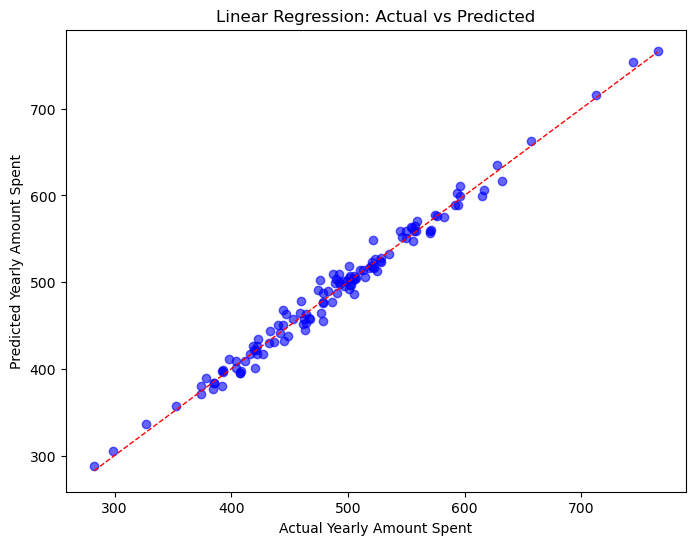

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=1)
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


In [57]:
#Detecting The Model Behaviour
y_train_pred=LinearRegressionModel.predict(X_train)
train_r2=r2_score(y_train,y_train_pred)
train_mse=mean_squared_error(y_train,y_train_pred)

test_mse=mean_squared_error(y_test,y_pred)
test_r2=r2_score(y_test,y_pred)

print(f'Train R²:{train_r2*100:.2f}%')
print(f'Train MSE:{train_mse:.2f}')
print(f'Test R²: {test_r2*100:.2f}%')
print(f'Test MSE: {test_mse:.2f}')

Train R²:98.39%
Train MSE:99.35
Test R²: 98.51%
Test MSE: 96.39
